# Thompson Sampling

Intuition - we are constructing distributions, which show where μ values will be, we are not trying to guess the distributions behind the machines. This shows that algorithm is hardly connected with probabilistic. 


Algorithm:
1. At each round n, consider two numbers for each ad i:
    - Number of times the ad i got reward 1 up to round n - $N^1_{i}(n)$
    - Number of times the ad i got reward 0 up to round n - $N^0_{i}(n)$

2. For each ad i, take a random draw from the distribution below:

$$\theta_i = \beta(N^1_{i}(n)+1, N^0_{i}(n)+1)$$

3. Select the ad that has the maximum $\theta_i$
4. We get the reward from a dataset for ad $i$ and update  $N^1_{i}$ and  $N^0_{i}$

## UCB vs Thompson Sampling

- UCB is a deterministic algorithm (we select a machine based on previous observations), Thompson Sampling is a probabilistic algorithm (we select a machine based on probability distribution)

- UCB requires update at every round, Thompson Sampling can accommodate delayed feedback (ex. we generate 5000 clicks on website, then run algorithm)

- Thompson Sampling is more efficient than UCB (better empirical evidence)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [5]:
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = np.random.beta(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

## Visualising the results - Histogram

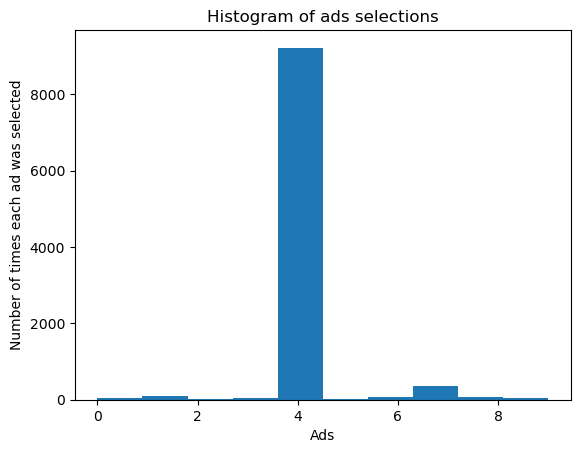

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()